# Week-1

**Note to Learners**:

- Click on "Copy to Drive", the button that appears just below the taskbar, to make a copy of this notebook in your drive. If you continue working with this notebook, changes **will not** be saved.


- For questions that involve plotting, just enter $0$ as the answer in the portal.
- For numerical questions, there are two parts. The first part expects you to compute some quantity, say a parameter of a machine learning model. The second part will require you to convert this quantity (if it is not a scalar) into a scalar so that it can be entered as the answer on the portal to the corresponding NAT question.



## Dataset

We will be working with a subset of the [MNIST dataset](https://en.wikipedia.org/wiki/MNIST_database). Run the cell given below to generate the data-matrix $\mathbf{X}$, which is of shape $(n, d)$, where $n$ denotes the number of samples and $d$ denotes the number of features. You will be using this dataset for the rest of the assignment. Do not edit this cell.

In [25]:
##### DATASET GENERATION #####
import numpy as np
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X = X_train[y_train == 2][: 100].reshape(-1, 28 * 28)
test_image = X_test[y_test == 2][0].reshape(28 * 28)
##### DO NOT EDIT THIS CELL #####

## Problem-1

How many samples does the dataset have?

In [26]:
# Problem 1
n, d = X.shape
print("Samples:", n)

Samples: 100


## Problem-2

How many features does the dataset have?

In [27]:
# Problem 2
n, d = X.shape
print("Features:", d)

Features: 784


## Problem-3

Each sample corresponds to an image of dimension $28 \times 28$. Visualize one of these images using the `matplotlib` library.

- You need to know how to reshape a feature vector. Refer to week-0 content for the same.
- You can refer to the following [document](https://matplotlib.org/stable/tutorials/introductory/images.html#sphx-glr-tutorials-introductory-images-py) for plotting NumPy arrays as images using `matplotlib`.

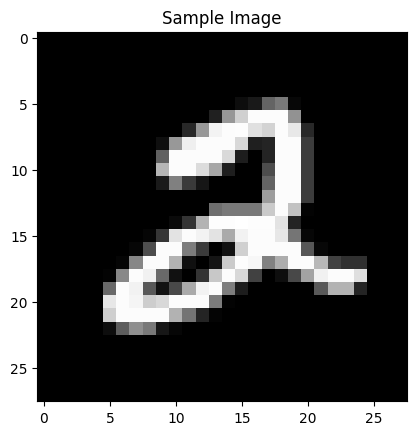

In [28]:
# Problem 3: Visualize one image
import numpy as np
import matplotlib.pyplot as plt

plt.imshow(X[0].reshape(28, 28), cmap='gray')
plt.title('Sample Image')
plt.show()

## Problem-4

Center the the dataset $\mathbf{X}$ around its mean. Call this centered dataset $\mathbf{X}^{\prime}$.

<u>Conversion</u>

Enter the following quantity as your answer correct to two decimal places:

$$
\cfrac{1}{n \cdot d} \sqrt{\sum \limits_{i = 1}^{n} \sum \limits_{j = 1}^{d} (X_{ij}^{\prime})^2}
$$

In [29]:
# Problem 4: Center dataset and compute scalar
X_mean = X.mean(axis=0)
X_centered = X - X_mean
scalar_centered = np.sqrt(np.sum(X_centered**2) / (n*d))
print(f"Scalar from centered data: {scalar_centered:.2f}")

Scalar from centered data: 65.08


## Problem-5

Compute the covariance matrix $\mathbf{C}$ of the centered dataset.

<u>Conversion</u>

Enter the following quantity as your answer correct to two decimal places:

$$
\cfrac{1}{d^2} \sqrt{\sum \limits_{i = 1}^{d} \sum \limits_{j = 1}^{d} C_{ij}^2}
$$

In [30]:
# Problem 5: Covariance matrix and scalar
C = np.cov(X_centered, rowvar=False)
scalar_cov = np.sqrt(np.sum(C**2) / (d**2))
print(f"Scalar from covariance matrix: {scalar_cov:.2f}")

Scalar from covariance matrix: 1080.82


## Problem-6

Compute the first and second principal components of the dataset, $\mathbf{w}_1$ and $\mathbf{w}_2$.

<u>Conversion</u>

Compute:
$$
\mathbf{w} = \mathbf{w}_1 + \mathbf{w}_2
$$

Enter the following quantity as your answer correct to two decimal places:

$$
\left| \sum \limits_{i = 1}^{d} w_i \right|
$$

In [31]:
# Problem 6: PCA to get first two principal components
eigvals, eigvecs = np.linalg.eigh(C)
idx = eigvals.argsort()[::-1]
eigvals = eigvals[idx]
eigvecs = eigvecs[:, idx]
w1 = eigvecs[:, 0]
w2 = eigvecs[:, 1]
w = w1 + w2
scalar_w = np.abs(np.sum(w))
print(f"Scalar for sum of w1 and w2: {scalar_w:.2f}")

Scalar for sum of w1 and w2: 1.05


## Problem-7

Visualize the first principal component as an image.

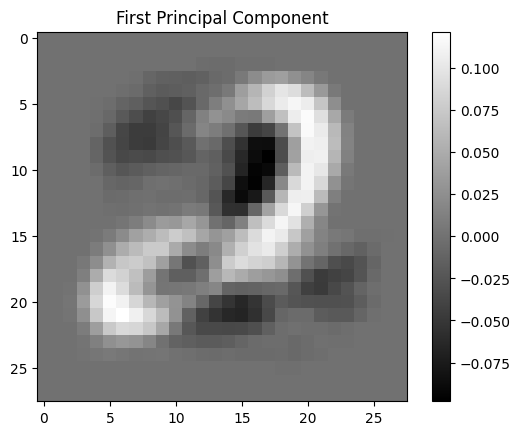

In [32]:
# Problem 7: Visualize first principal component as image
plt.imshow(w1.reshape(28, 28), cmap='gray')
plt.title('First Principal Component')
plt.colorbar()
plt.show()

## Problem-8

Find the smallest value of $k$ for which the first $k$ principal components capture at least $95\%$ of the variance in the data.

In [33]:
# Problem 8: Find smallest k for 95% variance
explained_variance = eigvals / np.sum(eigvals)
cumulative_variance = np.cumsum(explained_variance)
k_95 = np.searchsorted(cumulative_variance, 0.95) + 1
print(f"Smallest k for 95% variance: {k_95}")

Smallest k for 95% variance: 53


## Problem-9

Given a `test_image`, visualize the proxies  by reconstructing it using the top $k$ principal components. Consider four values of $k$; values of $k$ for which the top-$k$ principal components explain:

- 20% of the variance
- 50% of the variance
- 80% of the variance
- 95% of the variance



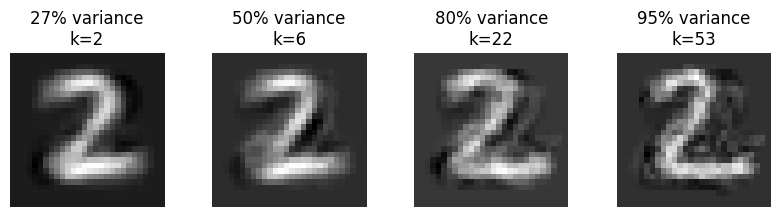

In [34]:
# Problem 9: Reconstruct test image for k values at 20%, 50%, 80%, 95%
def reconstruct_image(test_img, eigvecs, mean, k):
    proj = np.dot(test_img - mean, eigvecs[:, :k])
    recon = mean + np.dot(proj, eigvecs[:, :k].T)
    return recon

ks = []
for thresh in [0.20, 0.50, 0.80, 0.95]:
    ks.append(np.searchsorted(cumulative_variance, thresh) + 1)

plt.figure(figsize=(10,2))
for i, k in enumerate(ks):
    recon_img = reconstruct_image(test_image, eigvecs, X_mean, k)
    plt.subplot(1, 4, i+1)
    plt.imshow(recon_img.reshape(28,28), cmap='gray')
    plt.title(f'{int(cumulative_variance[k-1]*100)}% variance\nk={k}')
    plt.axis('off')
plt.show()